In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# We are creating a predictive model for NBA playoffs 2018-2019
We will be using the player data for the 2016-17 season to train our models and 2017-18 data to test our models.

In [52]:
df_tr = pd.read_csv("20162017_data.csv")
df_ts = pd.read_csv("20172018_data.csv")
df_2019 =pd.read_csv("20182019_data.csv")

In [7]:
df_tr

,PLAYER,TEAM,AGE,GAMES PLAYED,WINS,LOSSES,MINUTES PLAYED,POINTS,FIELD GOALS MADE,FIELD GOALS ATTEMPTED,...,TURNOVERS,STEALS,BLOCKS,PERSONAL FOULS,FANTASY POINTS,DOUBLE DOUBLES,TRIPLE DOUBLES,PLUS MINUS,PLAYOFFS,SEMI FINALS
0,DeAndre' Bembry,ATL,22,38,20,18,9.8,2.7,1.2,2.6,...,0.4,0.2,0.1,0.6,6.2,0,0,-1.2,1,0
1,Dennis Schroder,ATL,23,79,42,37,31.5,17.9,6.9,15.4,...,3.3,0.9,0.2,1.9,31.3,10,0,-1.0,1,0
2,Dwight Howard,ATL,31,74,37,37,29.7,13.5,5.2,8.3,...,2.3,0.9,1.2,2.7,34.9,53,0,-1.5,1,0
3,Ersan Ilyasova,ATL,30,82,35,47,26.1,13.1,4.7,10.9,...,1.4,0.7,0.3,2.6,24.2,10,0,-0.4,1,0
4,Gary Neal,ATL,32,2,1,1,9.2,2.0,0.0,3.5,...,0.0,0.0,0.0,0.5,3.4,0,0,-2.5,1,0
5,Jose Calderon,ATL,35,41,15,26,13.1,3.4,1.3,3.3,...,1.0,0.3,0.0,0.9,8.7,0,0,-2.6,1,0
6,Kent Bazemore,ATL,27,73,39,34,26.9,11.0,4.0,9.9,...,1.7,1.2,0.7,2.3,22.6,1,0,-1.5,1,0
7,Kris Humphries,ATL,32,56,31,25,12.3,4.6,1.6,3.8,...,0.5,0.3,0.4,1.2,11.2,0,0,-1.2,1,0
8,Lamar Patterson,ATL,25,5,1,4,8.1,1.8,0.6,3.0,...,0.8,0.2,0.0,1.2,5.1,0,0,2.6,1,0
9,Malcolm Delaney,ATL,28,73,37,36,17.1,5.4,2.0,5.3,...,1.3,0.5,0.0,1.5,11.7,0,0,0.4,1,0


In [53]:
new_df_tr=df_tr.drop(labels=['TEAM', 'PLAYER'], axis=1)

new_df_ts = df_ts.drop(labels=['TEAM', 'PLAYER'], axis=1)

new_df_2019=df_2019.drop(labels=['TEAM', 'PLAYER'], axis=1)



In [9]:
new_df_ts

,AGE,GAMES PLAYED,WINS,LOSSES,MINUTES PLAYED,POINTS,FIELD GOALS MADE,FIELD GOALS ATTEMPTED,FIELD GOAL %,3 POINT FIELD GOALS MADE,...,TURNOVERS,STEALS,BLOCKS,PERSONAL FOULS,FANTASY POINTS,DOUBLE DOUBLES,TRIPLE DOUBLES,PLUS MINUS,PLAYOFFS,SEMI FINALS
0,25,15,1,14,13.9,4.6,1.7,4.9,34.2,1.2,...,0.5,0.2,0.1,0.8,8.2,0,0,-5.1,0,0
1,24,17,7,10,7.2,1.4,0.5,1.2,38.1,0.2,...,0.4,0.4,0.3,1.4,4.2,0,0,-2.6,0,0
2,25,15,4,11,27.0,10.7,4.1,10.1,40.8,1.0,...,0.9,1.3,0.1,1.7,22.4,0,0,-1.6,0,0
3,23,26,8,18,17.5,5.2,2.0,4.9,41.4,0.4,...,1.8,0.8,0.5,1.5,13.4,0,0,-2.9,0,0
4,24,67,21,46,31.0,19.4,7.5,17.1,43.6,1.1,...,2.7,1.1,0.1,2.2,33.2,5,0,-4.1,0,0
5,28,62,18,44,24.9,10.0,4.0,7.7,52.4,0.8,...,1.4,0.6,0.8,2.6,24.6,15,0,-2.5,0,0
6,23,67,18,49,17.4,6.6,2.4,5.8,41.8,0.3,...,1.3,0.5,0.1,1.7,13.7,0,0,-0.5,0,0
7,22,6,2,4,16.4,4.7,2.2,5.3,40.6,0.3,...,1.0,0.3,0.2,0.3,10.1,0,0,-7.0,0,0
8,30,1,0,1,5.4,2.0,1.0,1.0,100.0,0.0,...,1.0,0.0,0.0,1.0,2.2,0,0,-4.0,0,0
9,20,74,21,53,24.1,10.5,4.2,7.4,57.6,0.2,...,1.4,0.6,1.1,2.9,25.0,11,0,-3.0,0,0


In [10]:
col_names = list(new_df_tr)
print(col_names)

['AGE', 'GAMES PLAYED', 'WINS', 'LOSSES', 'MINUTES PLAYED', 'POINTS', 'FIELD GOALS MADE', 'FIELD GOALS ATTEMPTED', 'FIELD GOAL %', '3 POINT FIELD GOALS MADE', '3 POINT FIELD GOALS ATTEMPTED', '3 POINT FIELD GOALS %', 'FREE THROWS MADE', 'FREE THROWS ATTEMPTED', 'FREE THROW %', 'OFFENSIVE REBOUNDS', 'DEFENSIVE REBOUNDS', 'REBOUNDS', 'ASSISTS', 'TURNOVERS', 'STEALS', 'BLOCKS', 'PERSONAL FOULS', 'FANTASY POINTS', 'DOUBLE DOUBLES', 'TRIPLE DOUBLES', 'PLUS MINUS', 'PLAYOFFS', 'SEMI FINALS']


In [54]:
data_tr = new_df_tr.values
data_ts = new_df_ts.values
data_2019 = new_df_2019.values
print(data_tr.shape)
print(data_ts.shape)
print(data_2019.shape)

(486, 29)
(540, 29)
(457, 27)


In [56]:
#dividing data into X and y
X_tr = np.array(data_tr[:,:data_tr.shape[1]-2])
y_tr = np.array(data_tr[:,data_tr.shape[1]-2:])
X_ts = np.array(data_ts[:,:data_ts.shape[1]-2])
y_ts = np.array(data_ts[:,data_ts.shape[1]-2:])
X_2019=np.array(data_2019)
X_tr.shape, y_tr.shape, X_ts.shape, y_ts.shape,X_2019.shape

((486, 27), (486, 2), (540, 27), (540, 2), (457, 27))

# SVM-Here we are using the SVM model
SVM Using the linear Kernel

In [32]:
from sklearn import linear_model
from sklearn import svm

In [33]:
accuracy_train_svm_linear_playoff=[]
accuracy_test_svm_linear_playoff=[]
accuracy_train_svm_linear_semi=[]
accuracy_test_svm_linear_semi=[]
c_svm_linear = []

In [34]:
y_playoff_tr = y_tr[:,0] #seperating the data further into who made playoffs and semi-finals
y_semi_tr = y_tr[:,1]
y_playoff_ts = y_ts[:,0] 
y_semi_ts = y_ts[:,1]

In [35]:
def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc_linear_playoff = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear_semi = svm.SVC(probability = False, kernel = 'linear', C = c)

    
    #fit the training data playoff and semi
    svc_linear_playoff.fit(X_tr,y_playoff_tr)
    svc_linear_semi.fit(X_tr,y_semi_tr)
    
    # Find the prediction and accuracy on both training sets playoff and semi
    Yhat_svc_linear_train_playoff = svc_linear_playoff.predict(X_tr)
    acc_train_playoff = np.mean(Yhat_svc_linear_train_playoff == y_playoff_tr)
    accuracy_train_svm_linear_playoff.append(acc_train_playoff)
    print('training Accuracy Playoffs = {0:f}'.format(acc_train_playoff))
    
    #semi
    Yhat_svc_linear_train_semi = svc_linear_semi.predict(X_tr)
    acc_train_semi = np.mean(Yhat_svc_linear_train_semi == y_semi_tr)
    accuracy_train_svm_linear_semi.append(acc_train_semi)
    print('training Accuracy Semi Finals = {0:f}'.format(acc_train_semi))
    
    
    
    # Find the prediction and accuracy on both test sets.
    #playoff
    
    Yhat_svc_linear_test_playoff = svc_linear_playoff.predict(X_ts)
    acc_test_playoff = np.mean(Yhat_svc_linear_test_playoff == y_playoff_ts)
    accuracy_test_svm_linear_playoff.append(acc_test_playoff)
    print('Test Accuracy Playoff = {0:f}'.format(acc_test_playoff))
    
    #semi
    
    Yhat_svc_linear_test_semi = svc_linear_semi.predict(X_ts)
    acc_test_semi = np.mean(Yhat_svc_linear_test_semi == y_playoff_ts)
    accuracy_test_svm_linear_semi.append(acc_test_semi)
    print('Test Accuracy Semi Finals = {0:f}'.format(acc_test_semi))
    
    c_svm_linear.append(c)
    

training Accuracy Playoffs = 0.823045
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.788889
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.831276
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.820370
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.827160
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.818519
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.833333
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.818519
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.839506
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.816667
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.843621
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.820370
Test Accuracy Semi Finals = 0.479630
training Accuracy Playoffs = 0.843621
training Accuracy Semi Finals = 0.866255
Test Accuracy Playoff = 0.8

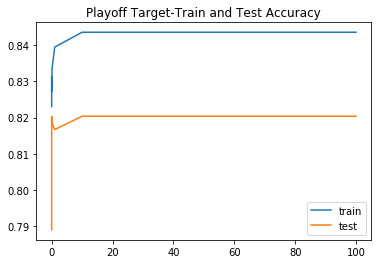

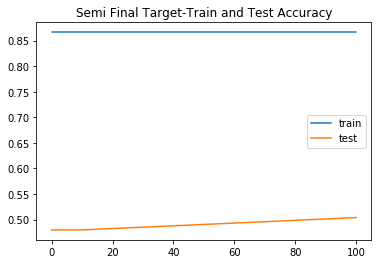

In [36]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_linear(.0001)
svm_linear(.001)
svm_linear(.01)
svm_linear(.1)
svm_linear(1)
svm_linear(10)
svm_linear(100)

# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.figure()

#playoff
train_playoff, = plt.plot(c_svm_linear, accuracy_train_svm_linear_playoff, label="train")
test_playoff, = plt.plot(c_svm_linear, accuracy_test_svm_linear_playoff, label="test")
plt.title('Playoff Target-Train and Test Accuracy LINEAR KERNEL')
plt.legend([train_playoff, test_playoff], ['train', 'test'])

plt.figure()
#semi
train_semi, = plt.plot(c_svm_linear, accuracy_train_svm_linear_semi, label="train")
test_semi, = plt.plot(c_svm_linear, accuracy_test_svm_linear_semi, label="test")
plt.title('Semi Final Target-Train and Test Accuracy LINEAR KERNEL')
plt.legend([train_semi, test_semi], ['train', 'test'])

#playoff
print("Playoff Max Training Accuracy: ",np.max(accuracy_train_svm_linear_playoff))
print("Playoff Max Testing Accuracy: ",np.max(accuracy_test_svm_linear_playoff))
print("Playoff Average Training Accuracy: ",np.mean(accuracy_train_svm_linear_playoff))
print("Playoff Average Testing Accuracy: ",np.mean(accuracy_test_svm_linear_playoff))

#semi
print("Semi-Final Max Training Accuracy: ",np.max(accuracy_train_svm_linear_semi))
print("Semi-Final Max Testing Accuracy: ",np.max(accuracy_test_svm_linear_semi))
print("Semi-Final Average Training Accuracy: ",np.mean(accuracy_train_svm_linear_semi))
print("Semi-Final Average Testing Accuracy: ",np.mean(accuracy_test_svm_linear_semi))


# SVM using Radial Basis Kernel
Here we train a model using the SVM Radial Basis Kernel

In [45]:
accuracy_train_svm_rbf_playoff=[]
accuracy_test_svm_rbf_playoff=[]
accuracy_train_svm_rbf_semi=[]
accuracy_test_svm_rbf_semi=[]
c_svm_rbf = []

In [46]:
def svm_rbf(c,g):
    # g is the value of gamma. 
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'rbf', value of C = c and rbf paramter gamma = g.
    svc_rbf_playoff = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma=g)
    svc_rbf_semi = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma=g)
    
    #fit the training data
    svc_rbf_playoff.fit(X_tr,y_playoff_tr)
    svc_rbf_semi.fit(X_tr,y_playoff_tr)
    
    
    # Find the prediction and accuracy on both training sets playoff and semi
    Yhat_svc_rbf_train_playoff = svc_rbf_playoff.predict(X_tr)
    acc_train_playoff = np.mean(Yhat_svc_rbf_train_playoff == y_playoff_tr)
    accuracy_train_svm_rbf_playoff.append(acc_train_playoff)
    print('training Accuracy Playoffs = {0:f}'.format(acc_train_playoff))
    
    #semi
    Yhat_svc_rbf_train_semi = svc_rbf_semi.predict(X_tr)
    acc_train_semi = np.mean(Yhat_svc_rbf_train_semi == y_semi_tr)
    accuracy_train_svm_rbf_semi.append(acc_train_semi)
    print('training Accuracy Semi Finals = {0:f}'.format(acc_train_semi))
    
    
    
    # Find the prediction and accuracy on both test sets.
    #playoff
    
    Yhat_svc_rbf_test_playoff = svc_rbf_playoff.predict(X_ts)
    acc_test_playoff = np.mean(Yhat_svc_rbf_test_playoff == y_playoff_ts)
    accuracy_test_svm_rbf_playoff.append(acc_test_playoff)
    print('Test Accuracy Playoff = {0:f}'.format(acc_test_playoff))
    
    #semi
    
    Yhat_svc_rbf_test_semi = svc_rbf_semi.predict(X_ts)
    acc_test_semi = np.mean(Yhat_svc_rbf_test_semi == y_playoff_ts)
    accuracy_test_svm_rbf_semi.append(acc_test_semi)
    print('Test Accuracy Semi Finals = {0:f}'.format(acc_test_semi))
    
    
    c_svm_rbf.append(c)

training Accuracy Playoffs = 0.526749
training Accuracy Semi Finals = 0.133745
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 0.526749
training Accuracy Semi Finals = 0.133745
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 0.526749
training Accuracy Semi Finals = 0.133745
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 0.526749
training Accuracy Semi Finals = 0.133745
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 0.606996
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 0.606996
Test Accuracy Playoff = 0.520370
Test Accuracy Semi Finals = 0.520370
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 0.606996
Test Accuracy Playoff = 0.5

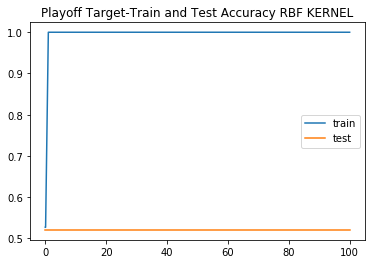

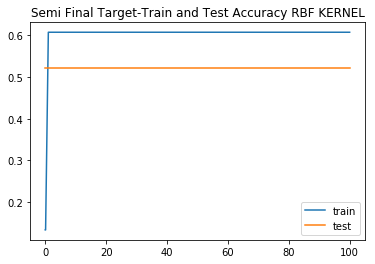

In [47]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_rbf(.0001,1)
svm_rbf(.001,1)
svm_rbf(.01,1)
svm_rbf(.1,10)
svm_rbf(1,10)
svm_rbf(10,100)
svm_rbf(100,100)

plt.figure()

#playoff
train_playoff, = plt.plot(c_svm_rbf, accuracy_train_svm_rbf_playoff, label="train")
test_playoff, = plt.plot(c_svm_rbf, accuracy_test_svm_rbf_playoff, label="test")
plt.title('Playoff Target-Train and Test Accuracy RBF KERNEL')
plt.legend([train_playoff, test_playoff], ['train', 'test'])

plt.figure()
#semi
train_semi, = plt.plot(c_svm_rbf, accuracy_train_svm_rbf_semi, label="train")
test_semi, = plt.plot(c_svm_rbf, accuracy_test_svm_rbf_semi, label="test")
plt.title('Semi Final Target-Train and Test Accuracy RBF KERNEL')
plt.legend([train_semi, test_semi], ['train', 'test'])

#playoff
print("Playoff Max Training Accuracy: ",np.max(accuracy_train_svm_rbf_playoff))
print("Playoff Max Testing Accuracy: ",np.max(accuracy_test_svm_rbf_playoff))
print("Playoff Average Training Accuracy: ",np.mean(accuracy_train_svm_rbf_playoff))
print("Playoff Average Testing Accuracy: ",np.mean(accuracy_test_svm_rbf_playoff))

#semi
print("Semi-Final Max Training Accuracy: ",np.max(accuracy_train_svm_rbf_semi))
print("Semi-Final Max Testing Accuracy: ",np.max(accuracy_test_svm_rbf_semi))
print("Semi-Final Average Training Accuracy: ",np.mean(accuracy_train_svm_rbf_semi))
print("Semi-Final Average Testing Accuracy: ",np.mean(accuracy_test_svm_rbf_semi))


# Polynomial Kernel
Here we train an SVM classifier using the Polynomial Kernel

In [49]:
accuracy_train_svm_poly_playoff=[]
accuracy_test_svm_poly_playoff=[]
accuracy_train_svm_poly_semi=[]
accuracy_test_svm_poly_semi=[]
c_svm_poly = []

In [50]:
def svm_poly(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_poly_playoff = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly_semi = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    #fit the training data playoff and semi
    svc_poly_playoff.fit(X_tr,y_playoff_tr)
    svc_poly_semi.fit(X_tr,y_semi_tr)
    
    # Find the prediction and accuracy on both training sets playoff and semi
    Yhat_svc_poly_train_playoff = svc_poly_playoff.predict(X_tr)
    acc_train_playoff = np.mean(Yhat_svc_poly_train_playoff == y_playoff_tr)
    accuracy_train_svm_poly_playoff.append(acc_train_playoff)
    print('training Accuracy Playoffs = {0:f}'.format(acc_train_playoff))
    
    #semi
    Yhat_svc_poly_train_semi = svc_poly_semi.predict(X_tr)
    acc_train_semi = np.mean(Yhat_svc_poly_train_semi == y_semi_tr)
    accuracy_train_svm_poly_semi.append(acc_train_semi)
    print('training Accuracy Semi Finals = {0:f}'.format(acc_train_semi))
    
    
    
    # Find the prediction and accuracy on both test sets.
    #playoff
    
    Yhat_svc_poly_test_playoff = svc_poly_playoff.predict(X_ts)
    acc_test_playoff = np.mean(Yhat_svc_poly_test_playoff == y_playoff_ts)
    accuracy_test_svm_poly_playoff.append(acc_test_playoff)
    print('Test Accuracy Playoff = {0:f}'.format(acc_test_playoff))
    
    #semi
    
    Yhat_svc_poly_test_semi = svc_poly_semi.predict(X_ts)
    acc_test_semi = np.mean(Yhat_svc_poly_test_semi == y_playoff_ts)
    accuracy_test_svm_poly_semi.append(acc_test_semi)
    print('Test Accuracy Semi Finals = {0:f}'.format(acc_test_semi))
    
    c_svm_poly.append(c)

training Accuracy Playoffs = 0.925926
training Accuracy Semi Finals = 0.977366
Test Accuracy Playoff = 0.777778
Test Accuracy Semi Finals = 0.587037
training Accuracy Playoffs = 0.969136
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.751852
Test Accuracy Semi Finals = 0.592593
training Accuracy Playoffs = 0.997942
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.729630
Test Accuracy Semi Finals = 0.588889
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.716667
Test Accuracy Semi Finals = 0.588889
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.716667
Test Accuracy Semi Finals = 0.588889
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.716667
Test Accuracy Semi Finals = 0.588889
training Accuracy Playoffs = 1.000000
training Accuracy Semi Finals = 1.000000
Test Accuracy Playoff = 0.7

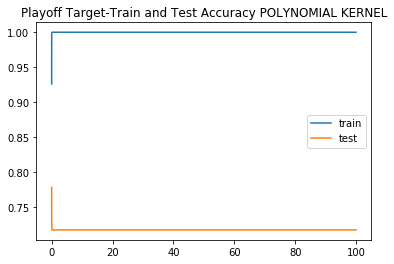

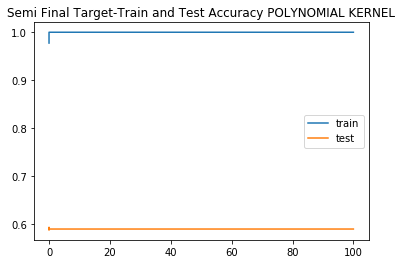

In [51]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_poly(.0001)
svm_poly(.001)
svm_poly(.01)
svm_poly(.1)
svm_poly(1)
svm_poly(10)
svm_poly(100)

# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.figure()

#playoff
train_playoff, = plt.plot(c_svm_poly, accuracy_train_svm_poly_playoff, label="train")
test_playoff, = plt.plot(c_svm_poly, accuracy_test_svm_poly_playoff, label="test")
plt.title('Playoff Target-Train and Test Accuracy POLYNOMIAL KERNEL')
plt.legend([train_playoff, test_playoff], ['train', 'test'])

plt.figure()
#semi
train_semi, = plt.plot(c_svm_poly, accuracy_train_svm_poly_semi, label="train")
test_semi, = plt.plot(c_svm_poly, accuracy_test_svm_poly_semi, label="test")
plt.title('Semi Final Target-Train and Test Accuracy POLYNOMIAL KERNEL')
plt.legend([train_semi, test_semi], ['train', 'test'])

#playoff
print("Playoff Max Training Accuracy: ",np.max(accuracy_train_svm_poly_playoff))
print("Playoff Max Testing Accuracy: ",np.max(accuracy_test_svm_poly_playoff))
print("Playoff Average Training Accuracy: ",np.mean(accuracy_train_svm_poly_playoff))
print("Playoff Average Testing Accuracy: ",np.mean(accuracy_test_svm_poly_playoff))

#semi
print("Semi-Final Max Training Accuracy: ",np.max(accuracy_train_svm_poly_semi))
print("Semi-Final Max Testing Accuracy: ",np.max(accuracy_test_svm_poly_semi))
print("Semi-Final Average Training Accuracy: ",np.mean(accuracy_train_svm_poly_semi))
print("Semi-Final Average Testing Accuracy: ",np.mean(accuracy_test_svm_poly_semi))



# Best Model


The Best Model for Playoff Was Linear c value=.001
The Best Model for Semi-Finals Poly c value=.001
Linear
Playoff Max Testing Accuracy:  0.8203703703703704
Semi Max Testing Accuracy:  0.5037037037037037
RBF
Playoff Max Testing Accuracy:  0.5203703703703704
Semi Max Testing Accuracy:  0.5203703703703704
Poly
Playoff Max Testing Accuracy:  0.7777777777777778
Semi Max Testing Accuracy:  0.5925925925925926


# Output Y Prediction Values for 2018-2019 Data So Far

In [63]:
#For the playoff predictions re-create the linear model, and output Yhat values for 2019
svc_linear_playoff = svm.SVC(probability = False, kernel = 'linear', C = .001)
svc_linear_playoff.fit(X_tr,y_playoff_tr)
Yhat_Playoff_2019 = svc_linear_playoff.predict(X_2019)
playoff_predictions_2019 = pd.DataFrame(Yhat_Playoff_2019)
playoff_predictions_2019.to_csv("2019PlayoffPredict.csv")

#For the semi-final predictions re-create the polynomial model, and output Yhat values for 2019
svc_poly_semi = svm.SVC(probability = False, kernel = 'poly', C = .001)
svc_poly_semi.fit(X_tr,y_playoff_tr)
Yhat_Semi_2019 = svc_poly_semi.predict(X_2019)
Semi_predictions_2019= pd.DataFrame(Yhat_Semi_2019)
Semi_predictions_2019.to_csv("2019SemiPredict.csv")